# Step 0: Load the data

We will use the movies [dataset of movies that is available on Kaggle](https://www.kaggle.com/datasets/utkarshx27/movies-dataset), which contains over 4800 entries with the following columns:

| Name |	Description  |
| ----- | ----- |
|index 	|The index of the dataframe |
|budget 	|The budget of the movie |
|genres 	|The genres of the movie |
|homepage 	|The homepage URL of the movie |
|id 	|The unique identifier of the movie |
|keywords 	|The keywords associated with the movie |
|original_language 	|The original language of the movie |
|original_title 	|The original title of the movie|
|overview 	|A brief overview or summary of the movie|
|popularity 	|The popularity score of the movie|
|production_companies 	|The production companies involved in making the movie |
|production_countries 	|The countries where the movie was produced |
|release_date 	|The release date of the movie |
|revenue 	|The revenue generated by the movie |
|runtime 	|The duration of the movie in minutes |
|spoken_languages 	|The languages spoken in the movie |
|status 	|The status of the movie (e.g., Released, Rumored) |
|tagline 	|The tagline or slogan of the movie |
|title 	|The title of the movie |
|vote_average 	|The average rating given to the movie by users |
|vote_count 	|The number of votes received by the movie 	|
|cast 	|The cast members of the movie |
|crew 	|The crew members involved in making the movie |
|director| 	The director of the movie |

We will only include movies with a vote count greater than 5 to ensure that their ratings are sufficiently representative. Additionally, the dataset appears to be incomplete for movies released in 2016 and beyond, so we will limit our analysis to movies released up to 2015.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('movie_dataset.csv')

# Data Cleaning and Preprocessing
# Convert 'release_date' to just a year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

df = df[df['budget'] > 0]

# Drop rows with missing values in important columns
df.dropna(subset=['budget', 'revenue', 'release_year', 'runtime'], inplace=True)

# Add profit column
df['profit'] = df['revenue'] - df['budget']

df = df[df['vote_count'] >= 5]
df = df[df['release_year'] <= 2015]

FIGURE_SIZE = (10, 6)

# Step 1: Exploring the data

Let's look closer at the data. What can we deduce from it?

#### Distribution of Movie Budgets

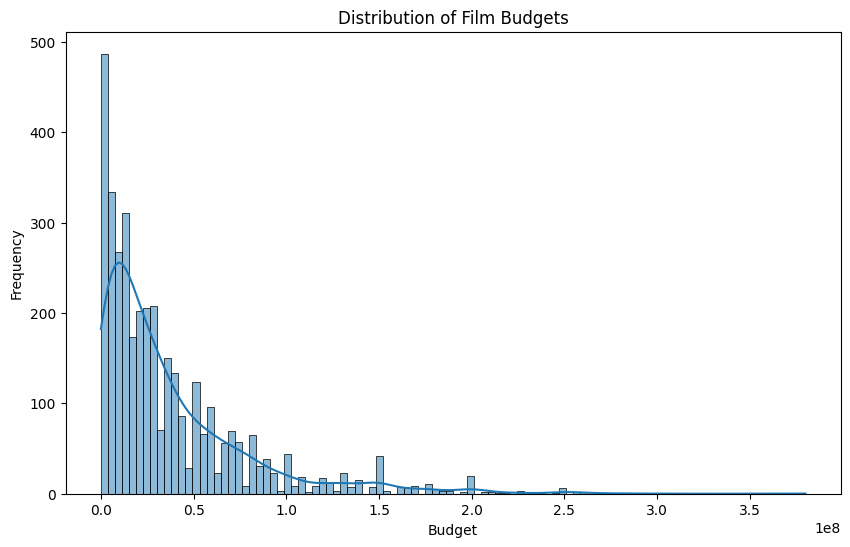

In [89]:
# 1. Distribution of Film Budgets
plt.figure(figsize=FIGURE_SIZE)
sns.histplot(df['budget'], bins=100, kde=True)
plt.title('Distribution of Film Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

Using [Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) we can see that the distribution of Movie Budgets is right-skewed: there are a lot of low-budget movies and then a steep decline.

#### Revenue (and Budget again)

Let's see what are the most profitable movies by revenue. Then, let's look how does budget affect a revenue.

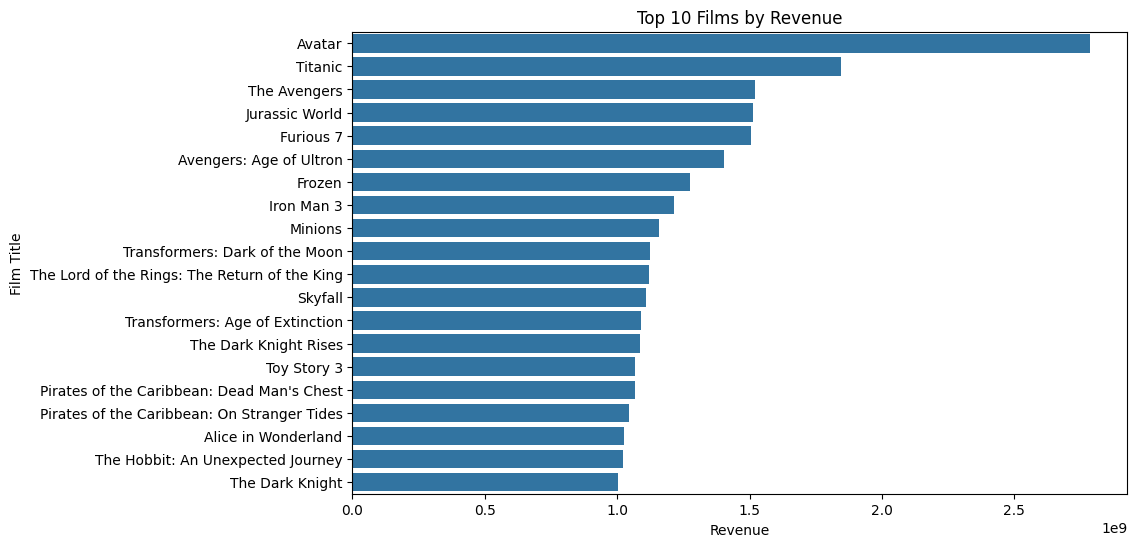

In [90]:
# 2. Top 10 Films by Revenue
top_revenue = df.nlargest(20, 'revenue')
plt.figure(figsize=FIGURE_SIZE)
sns.barplot(x='revenue', y='title', data=top_revenue)
plt.title('Top 10 Films by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Film Title')
plt.show()

We see what we would have expected: these are well-known movies that almost everyone has heard of, which is unsurprising. Now, an interesting question arises: does the budget influence revenue? Can you buy a movie's success?

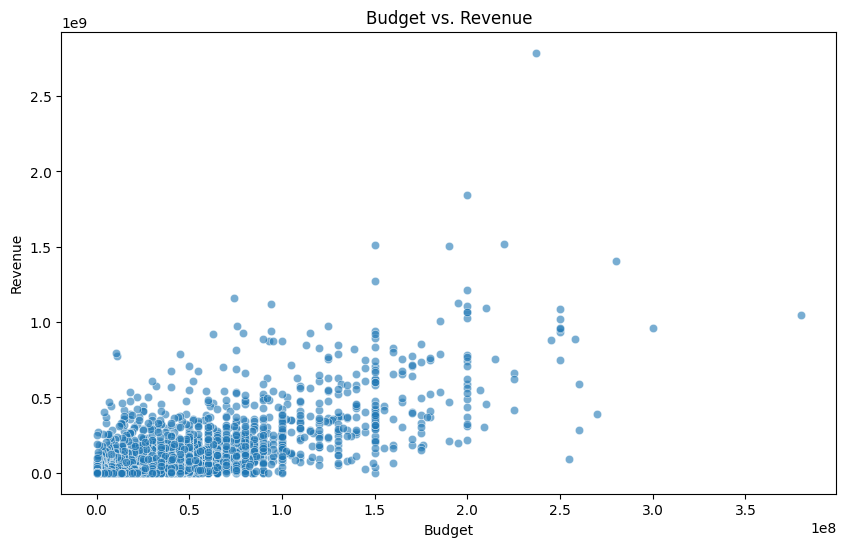

In [91]:
plt.figure(figsize=FIGURE_SIZE)
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

From this plot, we can deduce two key insights:

1. The majority of movies are not profitable, as they fall below the $y=x$ line, indicating that their revenues are less than their production costs.
2. There is a noticeable correlation between budget and revenue (as further illustrated by the correlation heatmap below). However, we see that the correlation is not strong enough, so higher budgets often increase the risk of financial loss.

#### Has Movie Runtime Changed Over Decades? And Is There a Change in Production Volume?

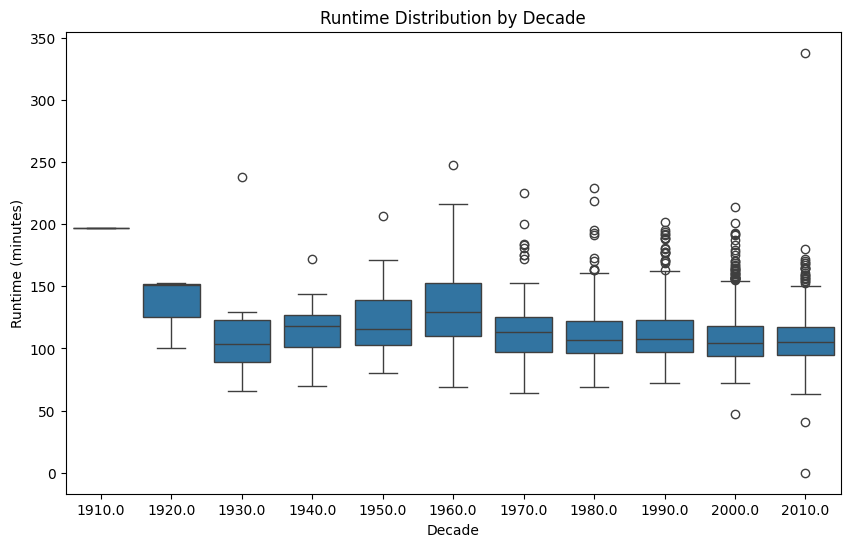

In [ ]:
df['decade'] = (df['release_year'] // 10) * 10
plt.figure(figsize=FIGURE_SIZE)
sns.boxplot(x='decade', y='runtime', data=df)
plt.title('Runtime Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Runtime (minutes)')
plt.show()

It seems that during the early days of the movie industry in the first half of the 20th century, filmmakers experimented with various runtimes. However, as we approached the 21st century, runtimes converged to a standard range of 100-150 minutes, with a few regular exceptions typically exceeding this interval.

What about production volume?

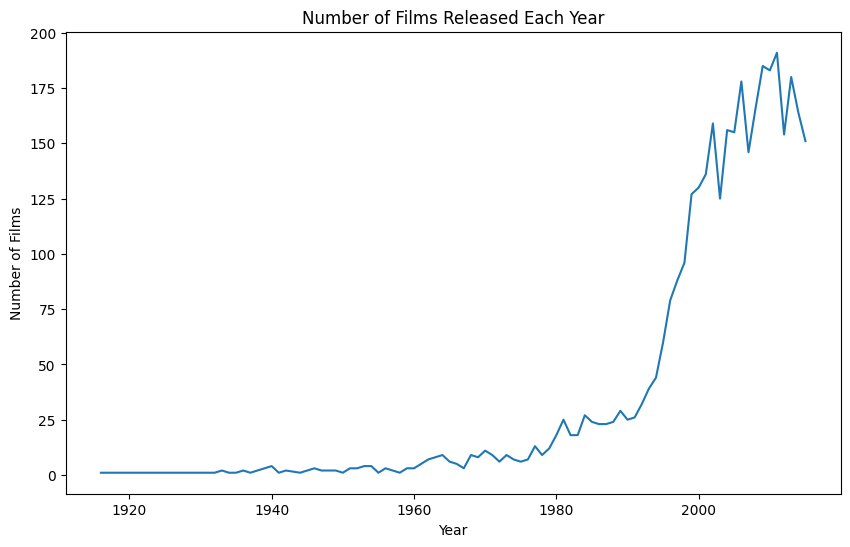

In [ ]:
films_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=FIGURE_SIZE)
sns.lineplot(x=films_per_year.index, y=films_per_year.values)
plt.title('Number of Films Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.show()

#### Movies' Popularity

Now, we would like to look at how revenue, budget, genre affects movie's popularity among general audience and critics. Let's look at films with hightest vote average.

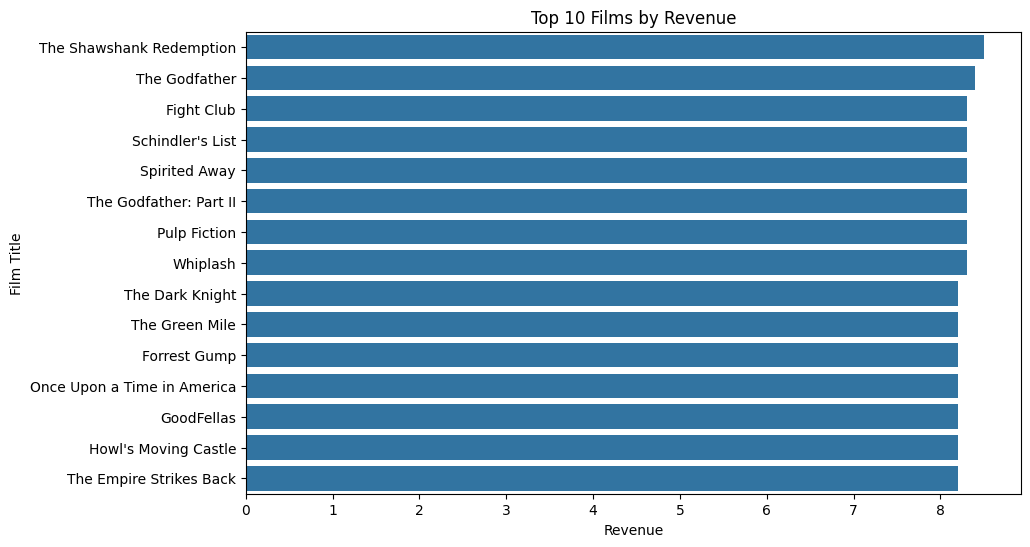

In [101]:
top_revenue = df.nlargest(15, 'vote_average')
plt.figure(figsize=FIGURE_SIZE)
sns.barplot(x='vote_average', y='title', data=top_revenue)
plt.title('Top 10 Films by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Film Title')
plt.show()

Once more, there are no surprises here: most of these films are well-known to us, we often consider them amazing and well-executed. What about vote average by genre?

In [115]:
# TODO: average rating by genre

TODO: comments on chart above

Now, let's calculate the correlation heat map between budget, revenue, popularity and vote average to see how different properties affect each other.

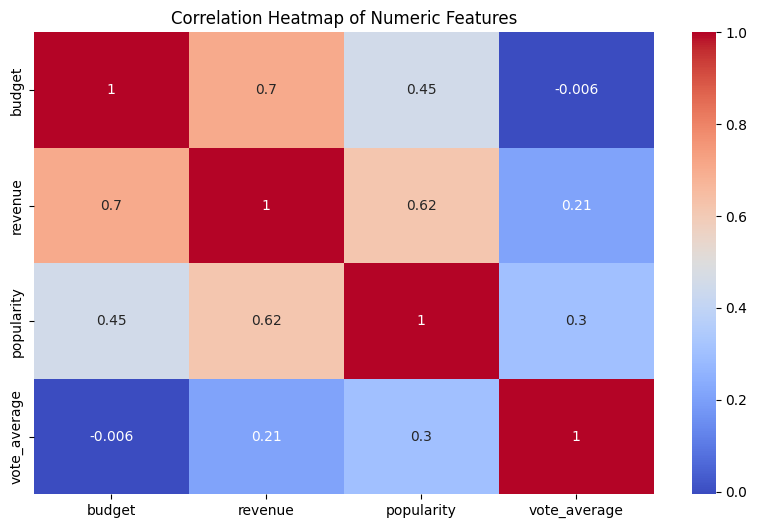

In [94]:
numeric_cols = ['budget', 'revenue', 'popularity', 'vote_average',]
correlation = df[numeric_cols].corr()
plt.figure(figsize=FIGURE_SIZE)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

We can draw several insights from this chart:

1. As we suggested earlier, there appears to be a correlation between budget and revenue. However, distinguishing between correlation and causation is quite hard here. It's plausible that both are influenced by factors such as the director's reputation: established directors like Christopher Nolan may attract more funding and attention, leading to higher budgets and revenues for their films. On the other hand, the budget itself surely may increase overall revenue, just take higher possible marketing expenses.

2. There appears to be no correlation between budget and average voter rating (vote average), implying that a film's success cannot simply be bought. Alternatively, it could indicate that higher budgets bring higher expectations, which may counteract potential benefits (meaning, that high budget cancels out with high expectation).

3. There is a noticeable correlation between popularity and budget. Movies with higher budgets tend to generate more buzz, potentially due to increased marketing efforts.